In [1]:
import pandas as pd
import numpy as  np

In [2]:
data = pd.read_excel('Tennis.xlsx')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
# label encoder untuk data kategorik menjadi data numerik

from sklearn.preprocessing import LabelEncoder

for col in ['outlook', 'temp', 'humidity', 'play' ]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data['outlook'].unique(), data['temp'].unique(), data['humidity'].unique(), data['play'].unique())

[2 0 1] [1 2 0] [0 1] [0 1]


In [4]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,False,0
1,2,1,0,True,0
2,0,1,0,False,1
3,1,2,0,False,1
4,1,0,1,False,1
5,1,0,1,True,0
6,0,0,1,True,1
7,2,2,0,False,0
8,2,0,1,False,1
9,1,2,1,False,1


In [5]:
# x dan y
x = np.asarray(data.drop(['play'], axis=1))
y = np.asarray(data['play'])

In [6]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [7]:
data.describe()

,outlook,temp,humidity,play
count,14.000000,14.000000,14.000000,14.000000
mean,1.071429,1.142857,0.500000,0.642857
std,0.828742,0.864438,0.518875,0.497245
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,1.000000
75%,2.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000


In [8]:
# standar scaler untuk mengatasi standar deviasi yang terlalu jauh
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [9]:
# model decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4) #max dept untuk kedalaman tree tapi mengurangi akurasi
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

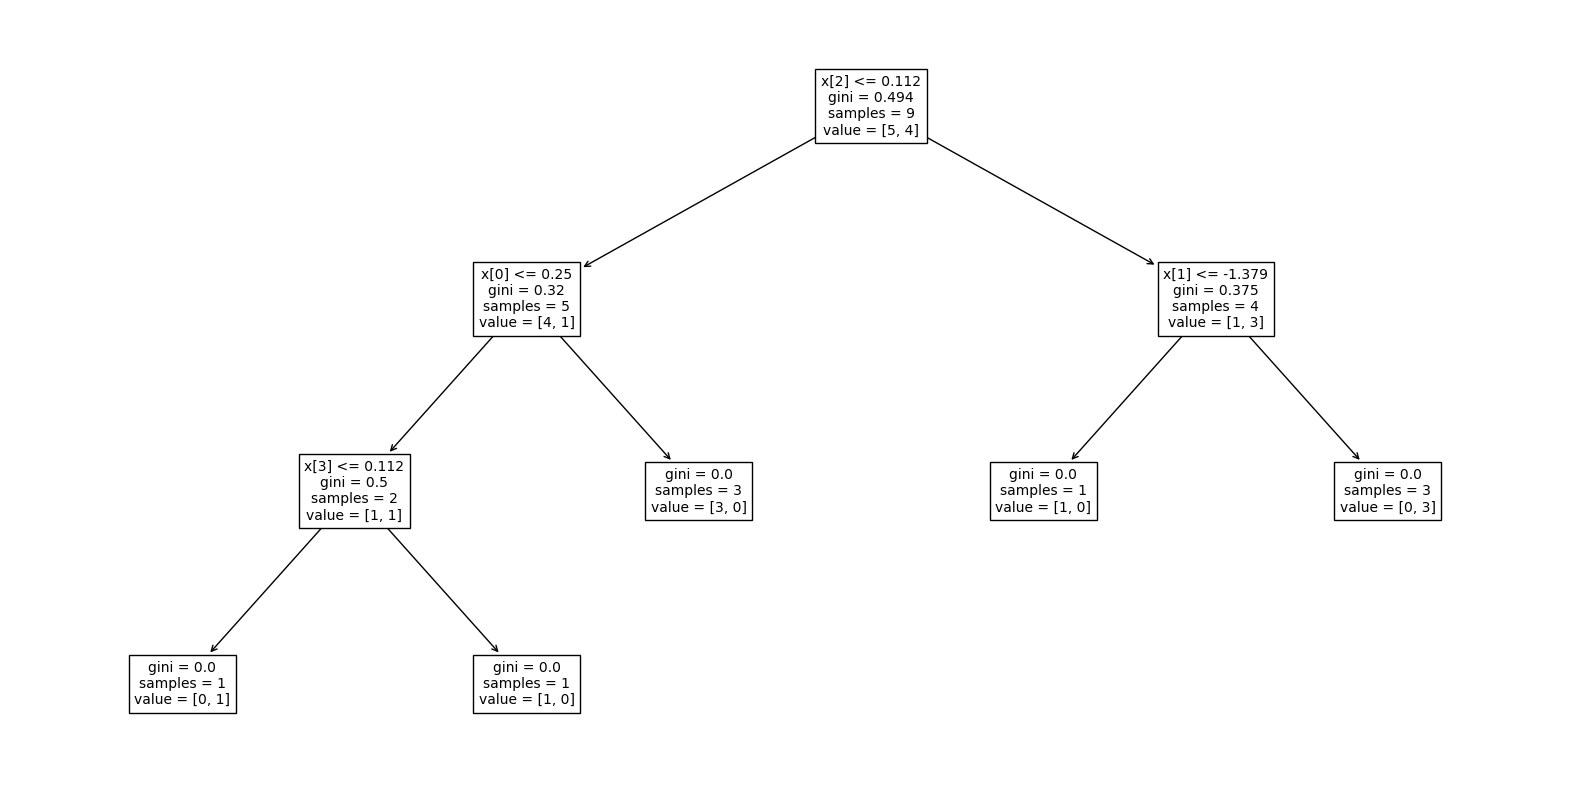

In [10]:
# visualisasi menggunakan tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize = (20, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

In [11]:
# prediksi data testing
predict = model.predict(x_test)

In [12]:
x_new = np.array([[0,2,1,0]])
predict = model.predict(x_new)
print(predict)

[1]


jika hasilnya 1 maka jawaban dari play yaitu  yes, karena yes = 1